In [3]:
import torch
from matplotlib import pyplot as plt

start
10000


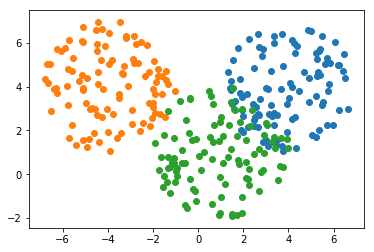

1.812521 , 0.4444828
2.2611952 , 0.22297859
-1.3332462 , 0.27948475
2.2013254 , -0.20306206
-0.37010193 , 3.4836216
0.9737406 , 2.3708096
0.9357319 , -1.843195
-1.1327047 , 0.555871
1.182332 , -0.4279604
-0.37921333 , 1.8958311
-0.5391226 , 2.4729748
-1.6610394 , 0.7961283
-1.0276661 , -0.3372097
-1.495039 , 1.7693253
-0.35454655 , 3.4253902
1.73911 , 1.7457771
-1.4998322 , -0.06837082
1.4432516 , 1.1381865
-0.5740099 , 0.526495
-0.5677128 , -1.4080105
1.0940437 , 1.7354622
0.71746445 , 2.24304
-0.35533714 , -0.21828651
-1.0812874 , 0.74461174
0.97618675 , -0.12411976
3.6427078 , 0.37908936
1.526021 , -1.8342676
-1.3457241 , 0.7662258
2.107872 , -0.17851639
-0.1280365 , -0.7499409
0.61505985 , 0.671278
1.481 , 3.2839775
-0.071876526 , -1.2332125
1.9556894 , -1.0489397
0.548254 , 1.7045326
-0.93056774 , -0.06888008
3.4263983 , 1.1875801
0.61519814 , -1.3742208
-0.48275948 , -1.531887
3.680749 , 1.6551619
1.5111408 , -1.9062881
0.95520115 , -1.7671423
3.9875774 , 1.1903973
3.0599613 , 2.

In [5]:
#4,4일때

m2=24*torch.rand(10000,2)-12
#1,1일때
m4=24*torch.rand(10000,2)-12
#-4,4일때
m6=24*torch.rand(10000,2)-12

TRY1=torch.zeros(100,2)
TRY2=torch.zeros(100,2)
TRY3=torch.zeros(100,2)

count=0
cnt=0
print("start")
print(len(m2))

while True:
    if(count==100):
        break
    if ((m2[cnt,0]-4)**2 + (m2[cnt,1]-4)**2)<=9:
        TRY1[count,0]=m2[cnt,0]
        TRY1[count,1]=m2[cnt,1]
        count=count+1
    cnt+=1
    
a=torch.Tensor.numpy(TRY1[:,0])
b=torch.Tensor.numpy(TRY1[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m4[cnt,0]-(-4))**2 + (m4[cnt,1]-4)**2)<=9:
        TRY2[count,0]=m4[cnt,0]
        TRY2[count,1]=m4[cnt,1]
        count +=1
    cnt+=1

c=torch.Tensor.numpy(TRY2[:,0])
d=torch.Tensor.numpy(TRY2[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m6[cnt,0]-1)**2 + (m6[cnt,1]-1)**2)<=9:
        TRY3[count,0]=m6[cnt,0]
        TRY3[count,1]=m6[cnt,1]
        count+=1
    cnt+=1


e=torch.Tensor.numpy(TRY3[:,0])
f=torch.Tensor.numpy(TRY3[:,1])

plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f)
plt.show()

a_list=[];b_list=[];c_list=[]

for i in range(100):
    print(e[i],",",f[i])

e = torch.FloatTensor(e)
f = torch.FloatTensor(f)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)


TRY1_Y = torch.ones(100,1)
TRY2_Y = torch.zeros(100,1)
TRY3_Y = torch.ones(100,1)
    
X=torch.cat([TRY1,TRY2],dim=0)
X=torch.cat([X,TRY3])
print(X.shape)
Y = torch.cat([TRY1_Y,TRY2_Y])
Y = torch.cat([Y,TRY3_Y])
print(Y.shape)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(100001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%100 == 0:
        print(step, cost.item())
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False
    
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(),'\nAccuracy: ', accuracy.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))

torch.Size([300, 2])
torch.Size([300, 1])
0 0.6368974447250366
100 0.6358790397644043
200 0.6353559494018555
300 0.6350708603858948
400 0.6348999738693237
500 0.6347829699516296
600 0.6346903443336487
700 0.6346094012260437
800 0.634532630443573
900 0.6344573497772217
1000 0.6343812942504883
1100 0.6343042254447937
1200 0.6342255473136902
1300 0.6341447234153748
1400 0.634061872959137
1500 0.6339772343635559
1600 0.6338900923728943
1700 0.6338001489639282
1800 0.6337077021598816
1900 0.6336130499839783
2000 0.633514940738678
2100 0.6334140300750732
2200 0.6333097219467163
2300 0.6332026124000549
2400 0.633091926574707
2500 0.6329773664474487
2600 0.6328592300415039
2700 0.6327371001243591
2800 0.6326103806495667
2900 0.632479727268219
3000 0.6323440670967102
3100 0.6322041153907776
3200 0.6320584416389465
3300 0.6319075226783752
3400 0.6317508220672607
3500 0.6315885186195374
3600 0.63141930103302
3700 0.6312440633773804
3800 0.631061851978302
3900 0.6308721899986267
4000 0.63067436218

32500 0.03778822720050812
32600 0.03760883957147598
32700 0.0374312624335289
32800 0.037255555391311646
32900 0.03708159178495407
33000 0.03690946847200394
33100 0.036739036440849304
33200 0.036570366472005844
33300 0.036403361707925797
33400 0.03623802959918976
33500 0.03607434406876564
33600 0.035912271589040756
33700 0.035751793533563614
33800 0.03559291362762451
33900 0.0354355126619339
34000 0.035279713571071625
34100 0.035125356167554855
34200 0.03497250750660896
34300 0.03482113778591156
34400 0.034671198576688766
34500 0.03452274203300476
34600 0.0343756340444088
34700 0.03422989323735237
34800 0.03408550098538399
34900 0.03394242748618126
35000 0.03380078077316284
35100 0.0336604006588459
35200 0.033521343022584915
35300 0.033383533358573914
35400 0.033246900886297226
35500 0.03311159089207649
35600 0.032977521419525146
35700 0.03284463286399841
35800 0.0327129028737545
35900 0.0325823538005352
36000 0.032453034073114395
36100 0.03232480213046074
36200 0.03219768404960632
3630

63500 0.016634609550237656
63600 0.016609201207756996
63700 0.016583848744630814
63800 0.016558555886149406
63900 0.01653333753347397
64000 0.016508527100086212
64100 0.016483811661601067
64200 0.016459224745631218
64300 0.01643470674753189
64400 0.01641024835407734
64500 0.016385849565267563
64600 0.016361523419618607
64700 0.01633722521364689
64800 0.016313007101416588
64900 0.016288822516798973
65000 0.016264718025922775
65100 0.016240673139691353
65200 0.01621679961681366
65300 0.016193225979804993
65400 0.01616978831589222
65500 0.01614644192159176
65600 0.01612318865954876
65700 0.01610001176595688
65800 0.016076887026429176
65900 0.016053812578320503
66000 0.01603078655898571
66100 0.016007810831069946
66200 0.015984876081347466
66300 0.01596199907362461
66400 0.015939170494675636
66500 0.015916407108306885
66600 0.015894044190645218
66700 0.015871793031692505
66800 0.015849610790610313
66900 0.01582748256623745
67000 0.015805406495928764
67100 0.01578338071703911
67200 0.015761

94200 0.011863845400512218
94300 0.011854365468025208
94400 0.011844904161989689
94500 0.011835464276373386
94600 0.011826084926724434
94700 0.011816723272204399
94800 0.011807380244135857
94900 0.01179803442209959
95000 0.011788717471063137
95100 0.011779408901929855
95200 0.011770122684538364
95300 0.011760849505662918
95400 0.011751583777368069
95500 0.011742339469492435
95600 0.01173310074955225
95700 0.01172387320548296
95800 0.011714665219187737
95900 0.011705483309924603
96000 0.01169630791991949
96100 0.011687169782817364
96200 0.01167803630232811
96300 0.011668943800032139
96400 0.011660056188702583
96500 0.011651186272501945
96600 0.011642315424978733
96700 0.011633474379777908
96800 0.011624638922512531
96900 0.01161580253392458
97000 0.011606980115175247
97100 0.01159817073494196
97200 0.011589370667934418
97300 0.011580589227378368
97400 0.011571808718144894
97500 0.01156304869800806
97600 0.011554311960935593
97700 0.011545617133378983
97800 0.01153696421533823
97900 0.01

In [38]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(result3)

    # cost/loss function
    cost = criterion(hypothesis, result4)
    cost.backward()
    optimizer.step()

    if step%500 == 0:
        print(step, cost.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))

NameError: name 'result3' is not defined

In [39]:
import torch
import torch.nn
import numpy as np
import math, random
from matplotlib import pyplot as plt
device = 'cpu'

def get_random_point(radius,x1,y1):
    while True:
        # Generate the random point
        x = (random.random() * radius * 2) - radius
        y = (random.random() * radius * 2) - radius
        # Check that it is inside the circle
        if math.sqrt(x ** 2 + y ** 2) < radius:
            # Return it
            return [x+x1, y+y1]

In [1]:
#prepare dataset
x = list()
y = list()
for i in range(300):
    x.append(get_random_point(3,1,1))
    x.append(get_random_point(3,1,1))
    y.append(get_random_point(3,4,4))
    y.append(get_random_point(3,-4,4))

z = list()
for i in range(200):
    z.append([0.])
for i in range(200):
    z.append([1.])

for dot in x:
    plt.scatter(dot[0],dot[1],color='r')
for dot in y:
    plt.scatter(dot[0],dot[1],color='b')

NameError: name 'get_random_point' is not defined

In [2]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)

X = torch.FloatTensor(x+y)
Y = torch.FloatTensor(z)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%1000 == 0:
 #       print(step, cost.item())
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False
    
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(),'\nAccuracy: ', accuracy.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
#print(model(X))


IndentationError: expected an indented block (<ipython-input-2-8a7f4dd1fbe8>, line 41)